# Библиотека BeautifulSoup

✍ Для поиска необходимых нам данных мы будем использовать библиотеку BeautifulSoup, которая позволяет по названию тегов и их атрибутов получать содержащийся в них текст.

BeautifulSoup не является частью стандартной библиотеки, поэтому для начала её нужно установить. Например, в Jupyter Notebook это делается с помощью такой команды:

Устанавливаем библиотеку BeautifulSoup

!pip install beautifulsoup4 

После установки импортируем библиотеку в наш код:

In [1]:
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

еперь мы можем извлекать данные из любой веб-страницы.

Ранее мы уже получили содержимое страницы с помощью GET-запроса и сохранили информацию в переменной response , теперь создадим объект BeautifulSoup с именем page, указывая в качестве параметра html.parser.

Для примера получим информацию o title (с англ. заголовок) — это строка, которая отображается на вкладке браузера:

In [2]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title) # Получаем тег title, отображающийся на вкладке браузера
print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

<title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей


Если при запросе к сайту, а затем при его разборе с помощью BeautifulSoup в тексте страницы не находится нужный тег, попробуйте вывести на печать пару тысяч символов текста страницы. Если там обнаружится нечто похожее на капчу, возможно, сайт посчитал вас роботом и отказывается выдавать содержимое. Чтобы получить его, попробуйте «притвориться» браузером при запросе из скрипта:

In [3]:
requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

<Response [200]>

User-Agent своего браузера можно узнать [по этой ссылке ](https://whatmyuseragent.com/?copy=1).

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36

### Извлекаем заголовок и время написания статьи

Выполним поставленную ранее задачу: получить информацию о странице и извлечь заголовок статьи, опубликованной на этой странице, дату публикации, а также текст статьи.

Предположим, что мы знаем, что в HTML-коде рассматриваемой нами страницы заголовок статьи заключён в тег <h1> … </h1> (заголовок первого уровня).

Тогда мы можем получить его текст с помощью метода find() (с англ. найти) объекта BeautifulSoup, передав ему название интересующего нас тега:

In [4]:
# Применяем метод find() к объекту и выводим результат на экран
print(page.find('h1').text) 


            Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей
          


?
Но как же узнать, в каких именно тегах заключена необходимая информация?

Проще всего это сделать с помощью так называемого инструмента разработчика, который есть во всех современных браузерах. Покажем, как открыть данный инструмент на примере использования браузера Google Chrome.

Устанавливаем курсор на элементе [страницы](https://nplus1.ru/news/2021/10/11/econobel2021) (заголовок статьи), информацию о котором хотим получить, нажимаем на правую клавишу мыши и в выпадающем списке выбираем пункт «Просмотреть код элемента» или «Посмотреть код» в зависимости от браузера.

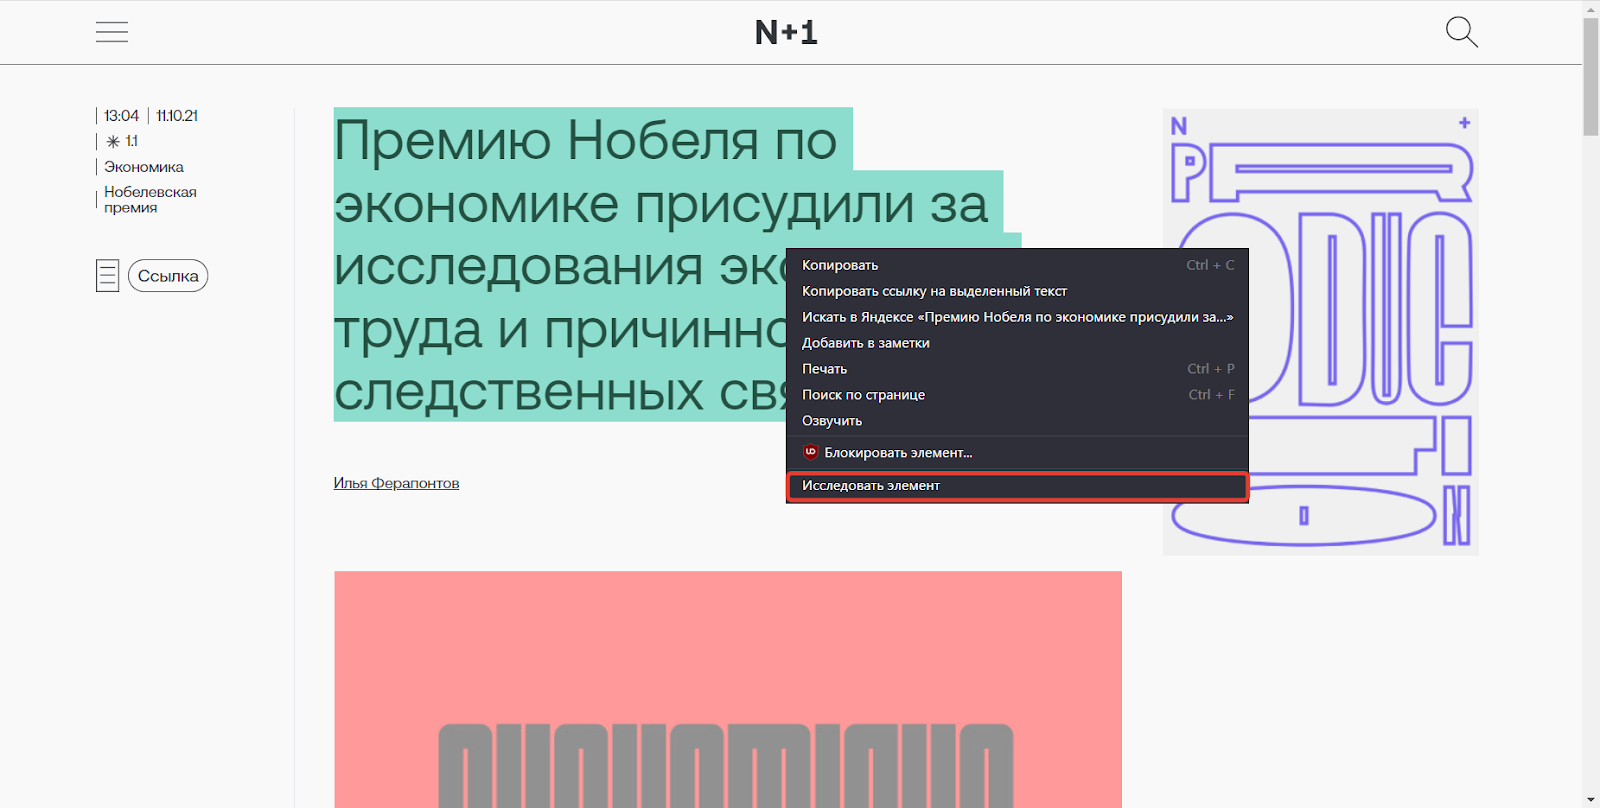

In [ ]:
В открывшемся окне инструмента разработчика видим, что информация о заголовке статьи заключена в теге <h1> … </h1>.

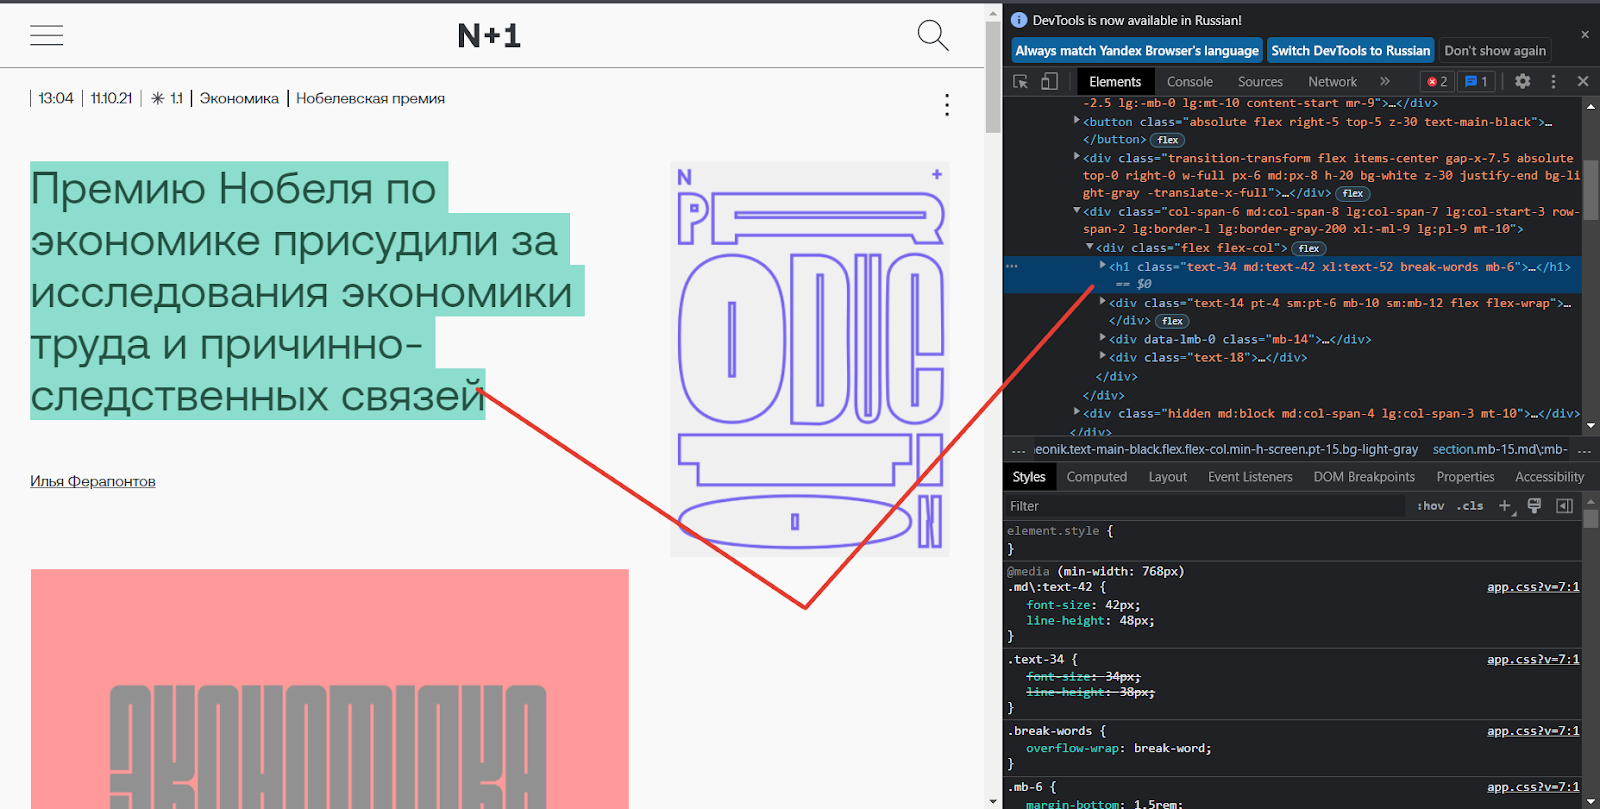

---

Задача

Напишите функцию wiki_header, которая по адресу страницы возвращает заголовок первого уровня для статей на Wikipedia.

Функция wiki_header принимает один аргумент - url.

In [6]:
import requests
from bs4 import BeautifulSoup

def wiki_header(url):
    try:
        # Получаем содержимое страницы
        response = requests.get(url)
        response.raise_for_status()  # Проверяем наличие ошибок

        # Парсим HTML с помощью BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Ищем заголовок первого уровня
        h1_tag = soup.find('h1', {'id': 'firstHeading'})
        if h1_tag:
            return h1_tag.text.strip()
        else:
            return "Заголовок не найден"

    except requests.RequestException as e:
        return f"Ошибка при запросе страницы: {e}"

# Пример использования
header = wiki_header('https://en.wikipedia.org/wiki/Operating_system')
print(header)  # Ожидается: 'Operating system'


Operating system


---

### Неуникальные теги: извлекаем текст и дату публикации статьи

Теперь получим сам текст статьи. Как вы уже знаете, первым делом необходимо определить, в какой тег он заключён. Применим, как и ранее, инструмент разработчика.

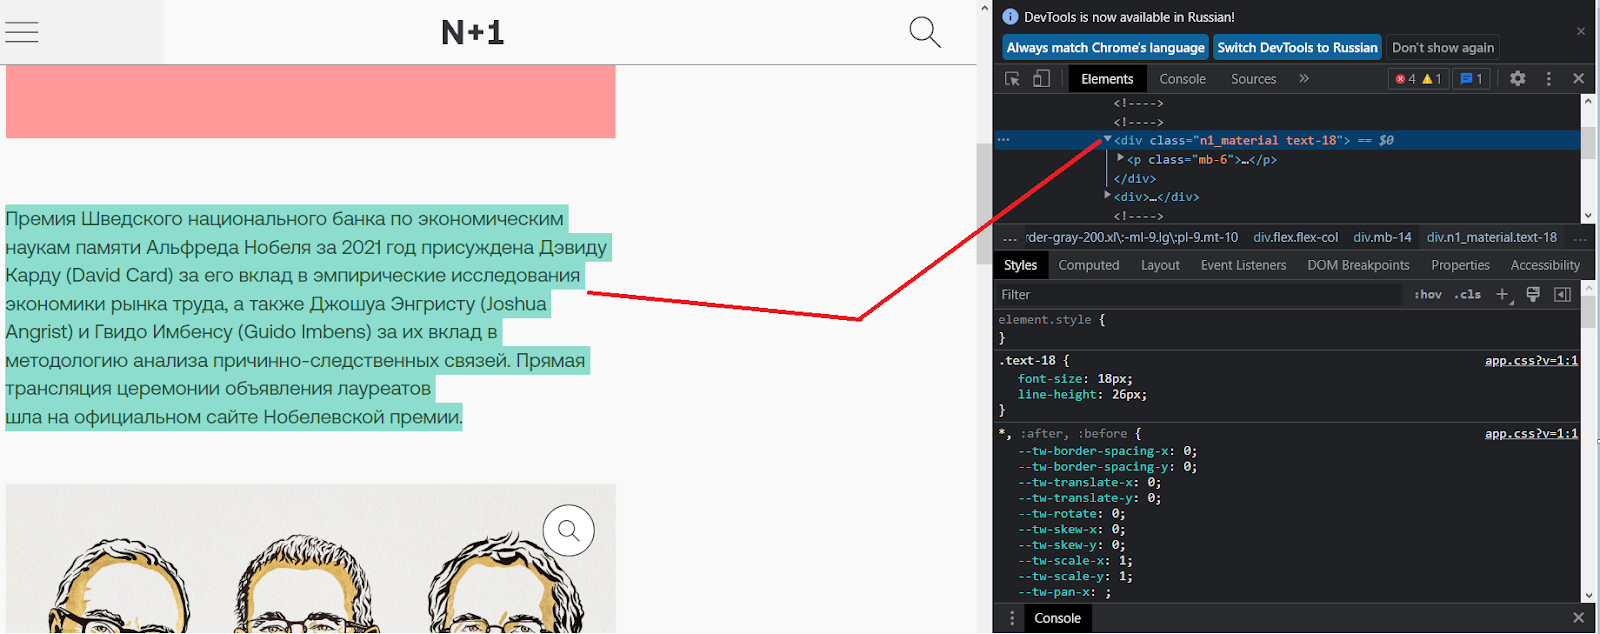

In [ ]:
Видим, что искомый текст заключён в тег  <div> … </div> . Попробуем извлечь его уже известным нам способом — с помощью метода find() — и выведем его на экран.

In [9]:
print(page.find('div').text) # Выводим содержимое атрибута text тега div

In [ ]:
Мы увидели не то, что ожидали — кучу текста, не имеющего отношения к тому, что мы искали...

?
В чём же проблема?

Дело в том, что теги <div> … </div> очень распространённые и на странице их очень много. Метод find() нашёл первый из них, но это не то, что нам надо.

Посмотрим на нашу страницу, используя инструмент разработчика, ещё раз. Можем заметить, что у искомого текста есть свой класс — n1_material text-18 :

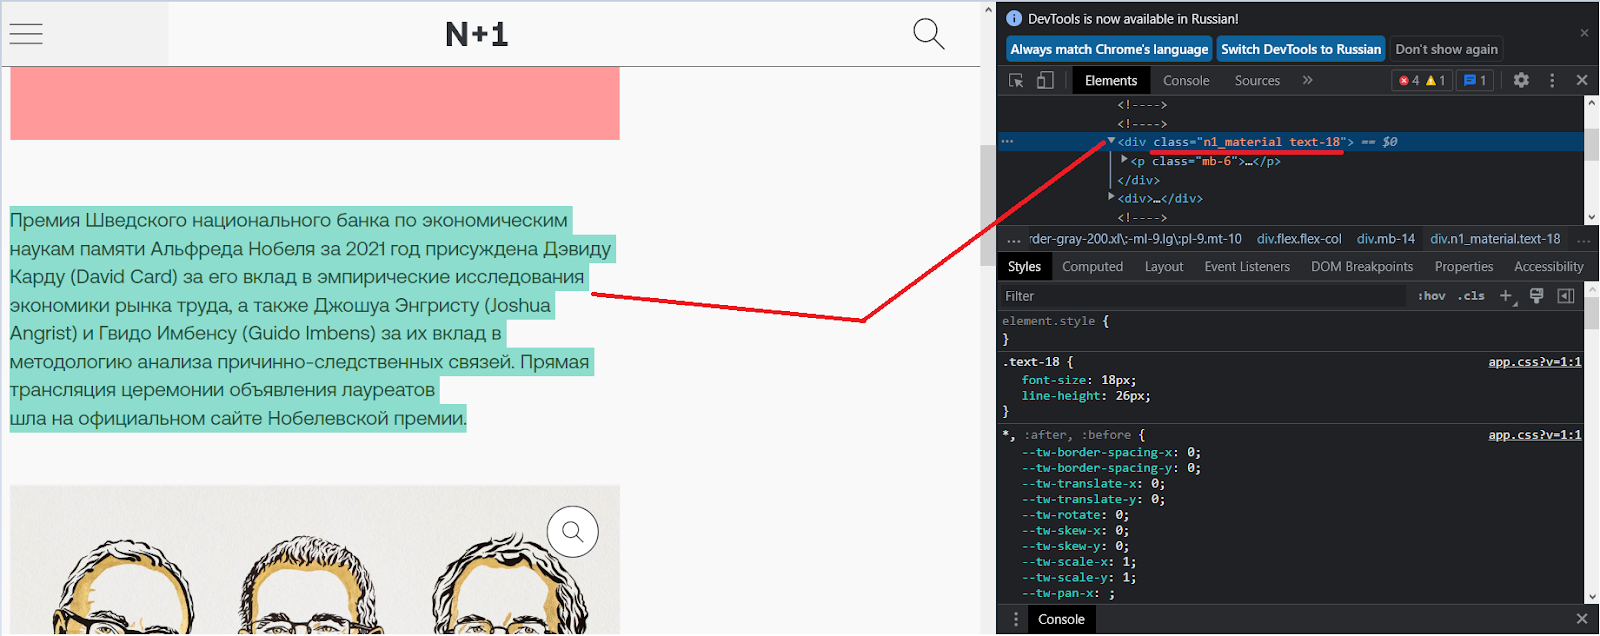

Передадим название класса в метод find() с помощью аргумента class_ и получим текст статьи:

In [10]:
print(page.find('div', class_='n1_material text-18').text) # Выводим содержимое атрибута text тега div класса n1_material text-18

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


В данном случае происходит поиск точного строкового значения class атрибута, т. е. выполнение строк кода:

In [11]:
print(page.find('div', class_='n1_material').text)

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


даст одинаковый результат.

При выполнении строки кода

In [12]:
print(page.find('div', class_='text-18 n1_material').text)

AttributeError: 'NoneType' object has no attribute 'text'

мы получим ошибку, так как такого строкового значения в области поиска нет.

Аналогично получим информации о теге, который содержит дату написания статьи, отображаемую в левом верхнем углу страницы.

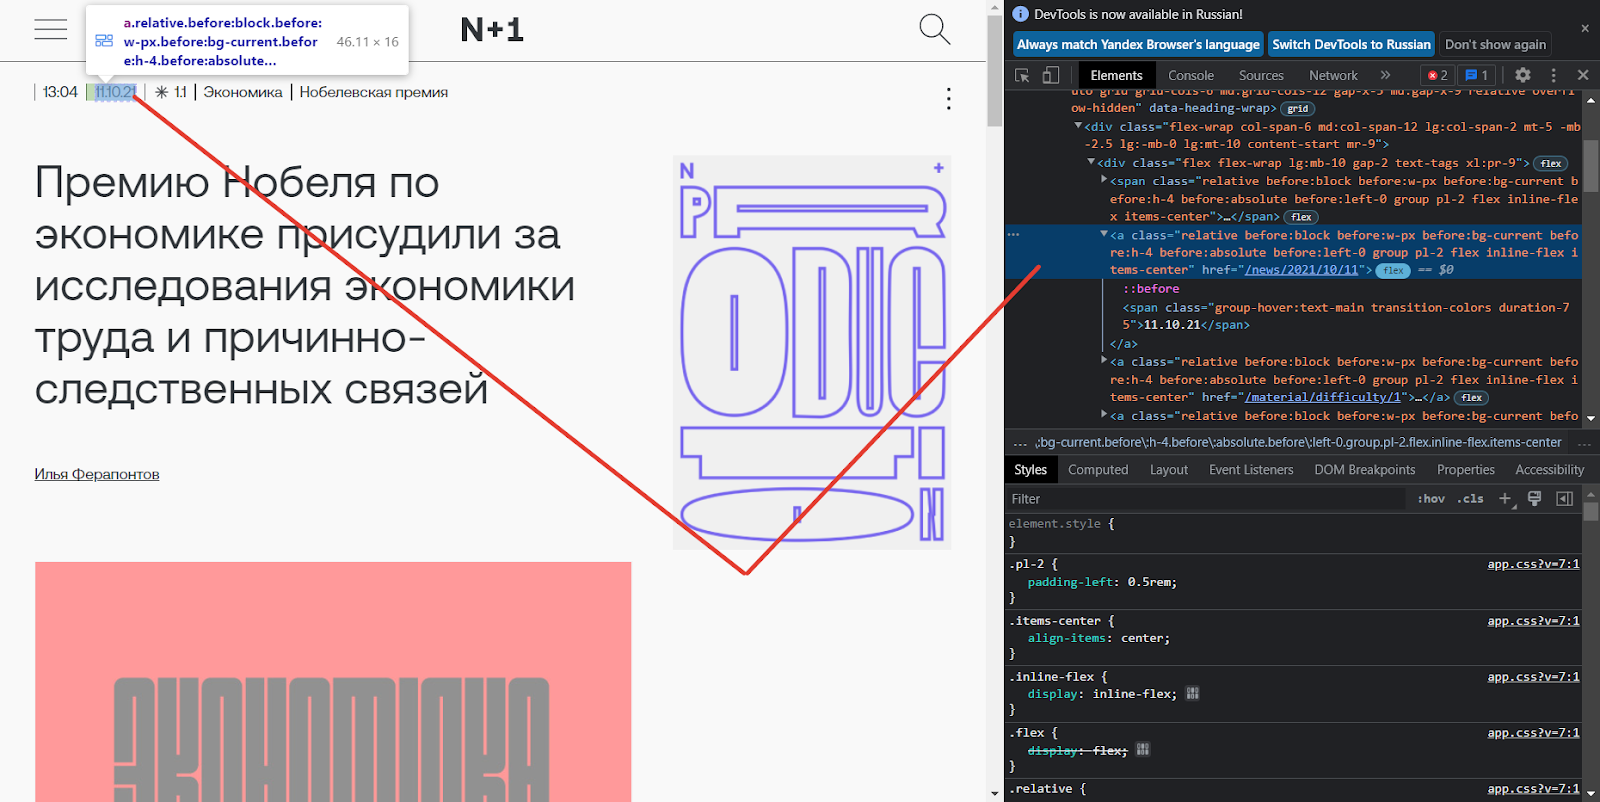

In [ ]:
Итак, нам нужен тег <a> … </a> с классом "relative before:block before:w-px before:bg-current before:h-4 before:absolute before:left-0 group pl-2 flex inline-flex items-center". Для поиска достаточно указать в качестве класса "relative", отбросив дополнительные настройки.

Теперь получим данные из него с помощью уже известного метода find(), передав название нужного тега:

In [13]:
# Выводим на экран содержимое атрибута text тега a с классом "relative"
print(page.find('a', class_= "relative").text)


11.10.21



Задача решена — мы извлекли из контента страницы заголовок статьи, опубликованной на странице, дату публикации, а также текст статьи.

Сбор нескольких элементов: собираем все ссылки на странице

Рассмотрим ещё один сценарий: вы хотите собрать сразу несколько элементов со страницы. Например, представьте, что вы хотите получить названия всех языков программирования, упомянутых на странице в Wikipedia в статье про языки программирования.

Можно заметить, что все названия языков программирования на этой странице связаны ссылками c соответствующими статьями о них. Таким образом, нам необходимо собрать все ссылки на странице. Для ссылок в HTML предусмотрен тег a> … </a. Попробуем использовать find():

In [14]:
url = 'https://en.wikipedia.org/wiki/List_of_programming_languages' # Задаём адрес ресурса
response = requests.get(url) # Делаем GET-запрос к ресурсу
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
print(page.find('a')) # Ищем ссылку по тегу <a> и выводим её на экран

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>


Мы получили только одну ссылку, хотя на странице их явно больше.

Это происходит, потому что метод find() возвращает только первый подходящий элемент. Если требуется получить больше элементов, необходимо воспользоваться методом find_all() (с англ. найти все):

In [15]:
links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print(len(links)) # Выводим количество найденных ссылок

951


Итак, на момент создания этих учебных материалов на странице содержалось 928 ссылок. Посмотрим на некоторые из них:

In [16]:
print([link.text for link in links[500:510]]) # Выводим ссылки с 500 по 509 включительно

['MAD', 'MAD/I', 'Magik', 'Magma', 'Maple', 'MAPPER', 'MARK-IV', 'Mary', 'MATLAB', 'MASM Microsoft Assembly x86']


Не все ссылки соответствуют названиям языков программирования — страница содержит также «служебные» ссылки, такие, например, как Jump to navigation (с англ. Перейти к навигации) или Alphabetical (с англ. По алфавиту):

In [17]:
print([link.text for link in links[0:10]]) # Выводим ссылки с 1 по 9 включительно

['Jump to content', 'Main page', 'Contents', 'Current events', 'Random article', 'About Wikipedia', 'Contact us', 'Help', 'Learn to edit', 'Community portal']


✍ В заключение заметим, что BeautifulSoup — достаточно мощная библиотека. Мы рассмотрели её базовые возможности, но их полный список гораздо шире. С ним можно ознакомиться в [официальной документации](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).